In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
filepath = '/content/timeseriesdata.csv'
df = pd.read_csv(filepath)
df

,Quarter,hdbrpi,labour-cost,gdp,population,cpi,exchange-rate,consumer-spending,overall unemployment,sti
0,1990 1Q,24.3,74.7,"16,669.50","2,647,627",61.907,1.8843,16.113111,31600,1458.400000
1,1990 2Q,24.4,70.5,"17,087.70","2,677,041",62.501,1.8396,16.999927,31600,1527.000000
2,1990 3Q,25.0,73.8,"17,930.10","2,706,454",63.181,1.7632,17.886744,31600,1098.700000
3,1990 4Q,24.7,84.9,"18,805","2,735,868",63.969,1.7445,18.773560,31600,1154.800000
4,1991 1Q,24.9,80.5,"18,521","2,750,577",64.249,1.7931,19.660376,31600,1490.800000
...,...,...,...,...,...,...,...,...,...,...
91,2012 4Q,146.7,98.3,"94,848.80","3,818,205",97.936,1.2221,113.643019,63500,3167.080078
92,2013 1Q,148.6,101.0,"93,773","3,824,842",98.574,1.2436,114.828898,65700,3308.100098
93,2013 2Q,149.4,88.5,"95,587.20","3,831,478",97.656,1.2652,115.705388,67900,3150.439941
94,2013 3Q,148.1,89.3,"96,028.30","3,838,115",98.865,1.2572,116.581878,63300,3167.870117


In [3]:
def todatetime(row):
    row['Quarter'] = row['Quarter'].replace(' 1Q', '-03')
    row['Quarter'] = row['Quarter'].replace(' 2Q', '-06')
    row['Quarter'] = row['Quarter'].replace(' 3Q', '-09')
    row['Quarter'] = row['Quarter'].replace(' 4Q', '-12')
    
    return row

df1 = df.apply(todatetime, axis='columns')
df1['Quarter'] = pd.to_datetime(df1['Quarter'], infer_datetime_format = True)

In [4]:
def tofloat(row):
    row['gdp'] = row['gdp'].replace(',', '')
    row['population'] = row['population'].replace(',', '')
    return row

df2 = df1.apply(tofloat, axis='columns')
df2['gdp'] = df2['gdp'].astype(float)
df2['population'] = df2['population'].astype(float)
df2['overall unemployment'] = df2['overall unemployment'].astype(float)

In [5]:
df3 = df2.drop(columns = 'Quarter')


In [6]:
df4 = df3.drop(columns=['hdbrpi'])


In [7]:
scaler = StandardScaler()
df5 = scaler.fit_transform(df4)

In [8]:
df6 = df3['hdbrpi'].to_numpy()


In [9]:
final = []
for index in range(len(df6)):
  final.append(np.insert(df5[index], 0, df6[index]))
final = np.array(final)
final

array([[ 2.43000000e+01, -1.92650360e+00, -1.39128467e+00,
        -1.92578236e+00, -1.65370294e+00,  1.81244809e+00,
        -1.33989190e+00, -1.19616047e+00, -1.08216452e+00],
       [ 2.44000000e+01, -2.51688609e+00, -1.37332140e+00,
        -1.83971538e+00, -1.58893176e+00,  1.56234592e+00,
        -1.30861042e+00, -1.19616047e+00, -9.77373757e-01],
       [ 2.50000000e+01, -2.05301413e+00, -1.33713712e+00,
        -1.75365133e+00, -1.51478293e+00,  1.13487823e+00,
        -1.27732894e+00, -1.19616047e+00, -1.63162864e+00],
       [ 2.47000000e+01, -4.92717535e-01, -1.29955685e+00,
        -1.66758435e+00, -1.42885752e+00,  1.03024936e+00,
        -1.24604747e+00, -1.19616047e+00, -1.54593241e+00],
       [ 2.49000000e+01, -1.11121348e+00, -1.31175573e+00,
        -1.62454501e+00, -1.39832564e+00,  1.30217252e+00,
        -1.21476599e+00, -1.19616047e+00, -1.03267151e+00],
       [ 2.55000000e+01, -1.77187961e+00, -1.28868525e+00,
        -1.58150567e+00, -1.32265022e+00,  1.147747

In [10]:
dataX = final


In [11]:
dataY = final[:, 0].reshape(96, 1)
dataY.shape

(96, 1)

In [12]:
num_features = 9

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataX, dataY, test_size=0.2, random_state=0, shuffle=False)

In [14]:
win_length = 6
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(76, 9)
(20, 9)
(76, 1)
(20, 1)


In [15]:
train_generator = TimeseriesGenerator(Xtrain, Ytrain, length=win_length, sampling_rate=1, batch_size=96)
test_generator = TimeseriesGenerator(Xtest, Ytest, length=win_length, sampling_rate=1, batch_size=96)

In [16]:
X_train = train_generator[0][0]
Y_train = train_generator[0][1]
X_test = test_generator[0][0]
Y_test = test_generator[0][1]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(70, 6, 9)
(70, 1)
(14, 6, 9)
(14, 1)


In [17]:
X_train[:, :win_length-1, 1:] = 0.
X_train[0]

array([[24.3       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [24.4       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [25.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [24.7       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [24.9       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [25.5       , -1.77187961, -1.28868525, -1.58150567, -1.32265022,
         1.14774702, -1.18895288, -1.19616047, -1.03404631]])

In [21]:
X_test[:, :win_length-1, 1:] = 0.
X_test[0]

array([[100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [101.4       ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [105.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [109.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [112.1       ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [116.6       ,  -1.08310003,   1.38472867,   1.30801158,
          1.03528261,  -0.88999818,   1.29911072,   0.51384089,
          1.02145667]])

In [18]:
arr1 = X_train[0, :win_length-1, 0]

In [19]:
arr2 = X_train[0, -1]

In [20]:
np.concatenate((arr1, arr2)).shape

(14,)

In [22]:
fX_train = []
for i in range(len(X_train)):
  fX_train.append(np.concatenate((X_train[i, :win_length-1, 0], X_train[i, -1])))

In [23]:
fX_train = np.array(fX_train)

In [24]:
fX_test = []
for i in range(len(X_test)):
  fX_test.append(np.concatenate((X_test[i, :win_length-1, 0], X_test[i, -1])))

In [25]:
fX_test = np.array(fX_test)

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(win_length+8,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='relu'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='relu'))
# model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [27]:
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(fX_train, Y_train, epochs=200, validation_data=(fX_test, Y_test), batch_size=6)

Epoch 1/200
12/12 [==============================] - 1s 43ms/step - loss: 188.9297 - mean_absolute_error: 11.3602 - val_loss: 299.9956 - val_mean_absolute_error: 17.0867
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 128.8370 - mean_absolute_error: 8.9993 - val_loss: 16.7427 - val_mean_absolute_error: 3.2182
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 55.3817 - mean_absolute_error: 5.8074 - val_loss: 52.5921 - val_mean_absolute_error: 5.8415
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 56.4260 - mean_absolute_error: 6.0193 - val_loss: 19.5675 - val_mean_absolute_error: 3.8990
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 41.0175 - mean_absolute_error: 4.7717 - val_loss: 21.8218 - val_mean_absolute_error: 4.2780
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 35.6480 - mean_absolute_error: 4.3844 - val_loss: 21.2855 - val_mean_absolute_error: 3.2251
Epoc

In [28]:
print("train MSE", history.history['loss'][-1])
print("val MSE", history.history['val_loss'][-1])

train MSE 4.32542610168457
val MSE 3.8125665187835693


In [30]:
X = np.concatenate((fX_train, fX_test))
X.shape

(84, 14)

In [32]:
Y_pred = model.predict(X)
Y_pred.shape

(84, 1)

In [35]:
Y = np.concatenate((Y_train, Y_test))
Y.shape

(84, 1)

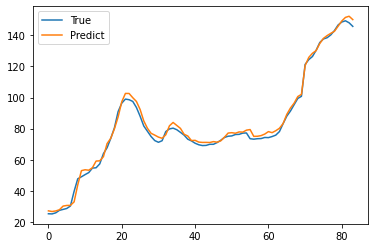

In [36]:
plt.plot(Y, label='True')
plt.plot(Y_pred,  label='Predict')
plt.legend()
plt.show()